<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/5.Closed-Loop/Ex_convers%C3%A3o_de_parametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Ajustando o tamanho da fonte de saída das células: OPCIONAL
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 25px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

# Conversão da forma paralela do PID para a forma em série

In [1]:
import sympy as sp

In [2]:
Kc, tauI, tauD, s = sp.symbols('Kc, tau_I, tau_D, s')

In [9]:
Gc_serie = Kc * ((tauI*s+1)/(tauI*s)) * (tauD*s + 1)
Gc_serie

Kc*(s*tau_D + 1)*(s*tau_I + 1)/(s*tau_I)

In [13]:
Gc_serie.expand()

Kc*s*tau_D + Kc*tau_D/tau_I + Kc + Kc/(s*tau_I)

Rearranjando para a forma pararela:
$$ K_c \Biggl(\frac{ \tau_I+\tau_D}{\tau_I}\Biggr)+ K_c \Biggl( \frac{ 1}{\tau_I s}\Biggr) + K_c \tau_D s $$

$$ K_c \Biggl(\frac{ \tau_I+\tau_D}{\tau_I}\Biggr) \Biggl[1 + \frac{1}{( \tau_I+\tau_D)s} + \frac{ \tau_I \tau_D}{\tau_I+\tau_D} s\Biggr] $$

$$ K_c \biggl( 1+\frac{\tau_D}{\tau_I} \biggr) \Biggl[1 + \frac{1}{( \tau_I+\tau_D)s} + \frac{ \tau_D}{1+ \frac{\tau_D}{\tau_I}} s\Biggr] $$

Dessa forma,

$$K_c ^\dagger = K_c \biggl( 1+\frac{\tau_D}{\tau_I} \biggr)$$

$$\tau_I ^\dagger = \tau_I+\tau_D $$

$$\tau_D ^\dagger =  \frac{ \tau_D}{1+ \frac{\tau_D}{\tau_I}}$$

Sabendo que $1+\frac{\tau_D}{\tau_I} \geq 1$, pode-se ver que a forma em série torna menores os ganho propocional e a constante de tempo integral e maior a constante de tempo derivativo, quando comparada a forma em paralelo.

Assim,

$$ K_c ^\dagger \geq K_c$$

$$ \tau_I ^\dagger \geq  \tau_I $$

$$ \tau_D ^\dagger \leq \tau_D $$

Quais são as magnitudes dessas relações quando $K_c=4$, $\tau_I=10$, e $\tau_𝐷=2$?

$K_c ^\dagger = 4 \biggl( 1+\frac{2}{10} \biggr) = 4.8$

$\tau_I ^\dagger = 10+2 = 12 $

$\tau_D ^\dagger = \frac{ 2}{1+ \frac{2}{10}} = 1.67$

# Simulação de uma malha fechada

Considere o processo $G_p = \frac{5}{2s+1}$ em malha fechada com PID nas formas em pararelo e em série.

In [41]:
! pip install -qq control

In [42]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [43]:
s = ct.tf('s')

# Processo
Gp = 5/(2*s+1)
Gp

TransferFunction(array([5]), array([2, 1]))

**Série**:  $K_c=4$, $\tau_I=10$, e $\tau_𝐷=2$

In [44]:
# Serie
Kc, tauI, tauD = 4.0, 10.0, 2.0
Gc_serie = Kc * ((tauI*s+1)/(tauI*s)) * (tauD*s + 1)
Gc_serie

TransferFunction(array([80., 48.,  4.]), array([10.,  0.]))

In [45]:
# Malha fechada (Serie)
G_serie = Gc_serie*Gp/(1 + Gc_serie*Gp)
G_serie = ct.minreal(G_serie, verbose=False)
ts, ys = ct. step_response(G_serie)

**Paralelo**:  $K_c=4.8$, $\tau_I=12$, e $\tau_𝐷=1.67$

In [52]:
# Paralelo
Kc, tauI, tauD = 4.8, 12.0, 1.67
Gc_par  = Kc * (1 + 1/(tauI*s) + tauD*s)
Gc_par

TransferFunction(array([96.192, 57.6  ,  4.8  ]), array([12.,  0.]))

In [53]:
# Malha fechada (Paralelo)
G_par = Gc_par*Gp/(1 + Gc_par*Gp)
G_par = ct.minreal(G_par, verbose=False)
tp, yp = ct. step_response(G_par)

**Resultado gráfico**

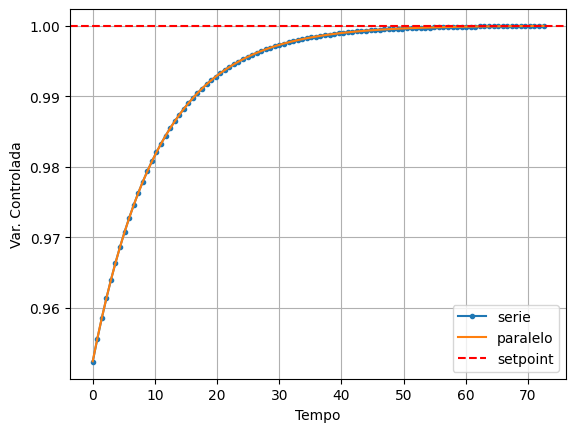

In [54]:
plt.plot(ts,ys, '.-', label = 'serie')
plt.plot(tp,yp, '-', label = 'paralelo')
plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'setpoint')
plt.xlabel('Tempo')
plt.ylabel('Var. Controlada')
plt.legend()
plt.grid()

Como esperado as respostas ao teste servo são coincidentes, o que confirma as expressões encontradas para os parâmetros.